<a href="https://colab.research.google.com/github/barbarosugurkan/kahvelab-beam-analysis/blob/main/2025-07-26/2025-07-26_histogram_scatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

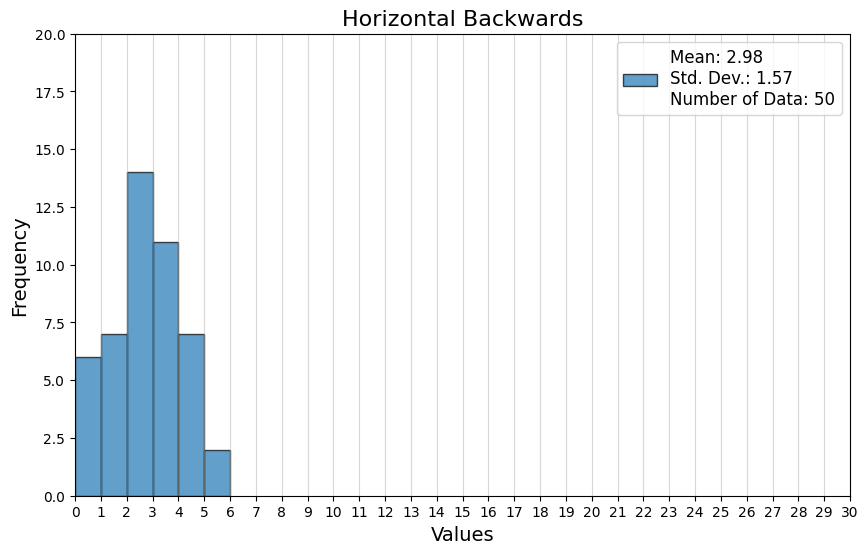

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

def extract_value_from_file(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if "ADC : channel #   0 reading =" in line:
                value_str = line.split("ADC : channel #   0 reading =")[1].split("+-")[0].strip()
                try:
                    return float(value_str)
                except ValueError:
                    print(f"⚠️ Error converting value in {file_path}: Not a valid float.")
                    return None
    print(f"⚠️ Warning: No ADC reading found in {file_path}.")
    return None


adc_value_list = []

main_folder_path = "/content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/02.08.25/"
for i in range(6,11):
  sub_folder_path = main_folder_path + "/" + str(i)
  for j in range(10):
    file_path = sub_folder_path + "/SEMtest0." + str(j) + ".adc"
    adc_value_list.append(extract_value_from_file(file_path))

# Ayarlanabilir bin genişliği
bin_width = 1 # Bu değeri istediğiniz gibi değiştirebilirsiniz

# Minimum ve maksimum değerleri bulma
min_val = int(min(adc_value_list))
max_val = int(max(adc_value_list))

# Binlerin kenarlarını hesaplama
bins = np.arange(min_val, max_val + bin_width, bin_width)

# Verilerin istatistiklerini hesaplama
mean_data = np.mean(adc_value_list)
std_dev_data = np.std(adc_value_list)
num_data_points = len(adc_value_list)

# Histogramı çizme
plt.figure(figsize=(10, 6)) # Grafiğin boyutunu ayarlama
plt.hist(adc_value_list, bins=bins, edgecolor='black', alpha=0.7)

# Başlık ve eksen etiketleri
plt.title('Horizontal Backwards', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Sağ üst köşeye istatistikleri eklemek için legend oluşturma
legend_text = f'Mean: {mean_data:.2f}\nStd. Dev.: {std_dev_data:.2f}\nNumber of Data: {num_data_points}'
plt.legend([legend_text], loc='upper right', frameon=True, fontsize=12)

# Izgarayı gösterme
plt.grid(axis='x', alpha=0.5)

plt.xlim(0,30)
plt.ylim(0,20)
integer_ticks = np.arange(0, 30 + 1, bin_width)
plt.xticks(integer_ticks)

# Grafiği gösterme
plt.show()


# **4 hist in same graph**

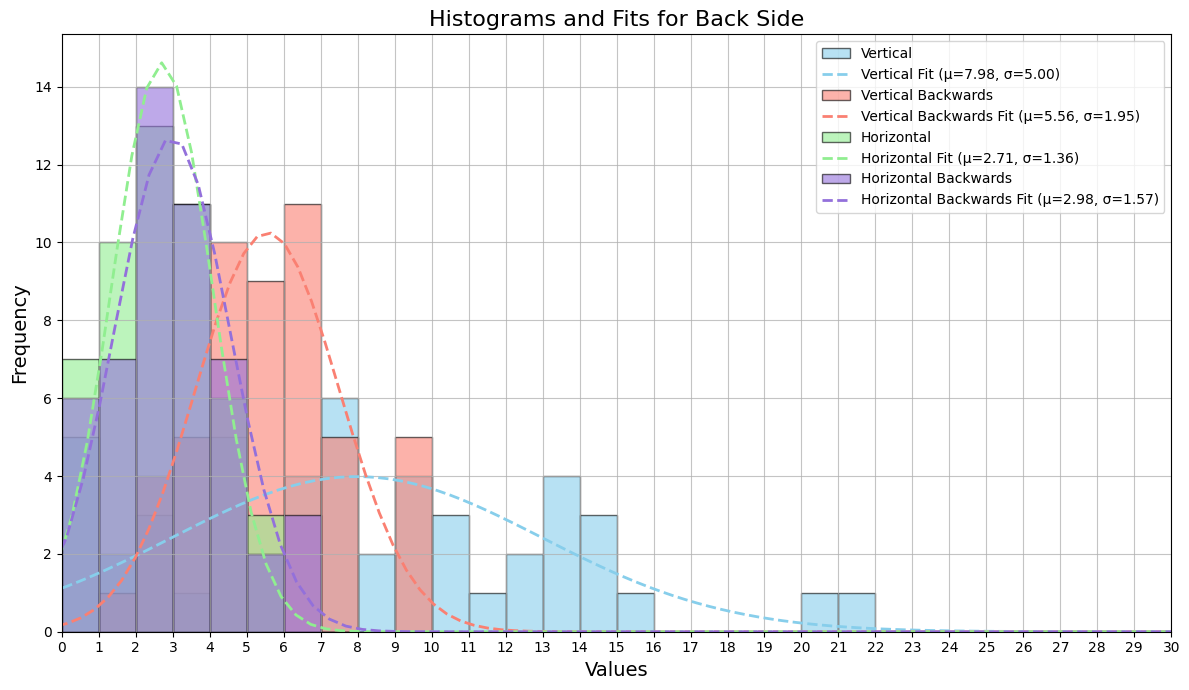

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

def extract_value_from_file(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if "ADC : channel #   0 reading =" in line:
                value_str = line.split("ADC : channel #   0 reading =")[1].split("+-")[0].strip()
                try:
                    return float(value_str)
                except ValueError:
                    print(f"⚠️ Error converting value in {file_path}: Not a valid float.")
                    return None
    print(f"⚠️ Warning: No ADC reading found in {file_path}.")
    return None

def create_list_of_data(path,range_low,range_high):
  value_list = []
  for i in range(range_low,range_high+1):
    sub_folder_path = path + "/" + str(i)
    for j in range(10):
      file_path = sub_folder_path + "/SEMtest0." + str(j) + ".adc"
      value_list.append(extract_value_from_file(file_path))

  return value_list

vertical_list = create_list_of_data("/content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5ver2",1,5)
vertical_backwards_list = create_list_of_data("/content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5ver_backwards2",6,10)
horizontal_list = create_list_of_data("/content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5hor2",1,5)
horizontal_backwards_list = create_list_of_data("/content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5hor_backwards2",6,10)

all_data = [vertical_list,vertical_backwards_list,horizontal_list,horizontal_backwards_list]
labels = ["Vertical","Vertical Backwards","Horizontal","Horizontal Backwards"]
colors = ['skyblue', 'salmon', 'lightgreen', 'mediumpurple']

bin_width = 1
x_min_fixed = 0
x_max_fixed = 30

bins = np.arange(x_min_fixed, x_max_fixed + bin_width, bin_width)
plt.figure(figsize=(12, 7))

for i, data in enumerate(all_data):
    counts, bin_edges, _ = plt.hist(data, bins=bins, color=colors[i],
                                    edgecolor='black', alpha=0.6,
                                    label=labels[i]) # density=True önemli

    mu, std = norm.fit(data) # Ortalama (mu) ve Standart Sapma (std) fit için

    # Normal dağılımın PDF'ini (Olasılık Yoğunluk Fonksiyonu) hesaplama
    # X değerlerini binlerin ortasından alabiliriz veya daha pürüzsüz bir çizgi için daha fazla nokta oluşturabiliriz.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100) # 100 nokta ile pürüzsüz bir eğri için

    p_scaled = norm.pdf(x, mu, std) * len(data) * bin_width

    # Normal dağılım eğrisini çizme
    plt.plot(x, p_scaled, color=colors[i], linestyle='--', linewidth=2,
             label=f'{labels[i]} Fit (μ={mu:.2f}, σ={std:.2f})')

plt.title('Histograms and Fits for Back Side', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xlim(x_min_fixed, x_max_fixed)
integer_ticks = np.arange(x_min_fixed, x_max_fixed + 1, bin_width)
plt.xticks(integer_ticks)

plt.grid(axis='both', alpha=0.75)

plt.legend(loc='upper right', fontsize=10, frameon=True, bbox_to_anchor=(1.0, 1.0))

# Grafiği düzenlemek için boşlukları ayarlama
plt.tight_layout()

# Grafiği gösterme
plt.show()



# **AVERAGED**

In [ ]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt # Although not used in the final Plotly visualization, kept for completeness
import plotly.graph_objects as go

main_directory_path = "/content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5hor2"
IS_VERTICAL = False
IS_BACKWARDS = False
IS_DIFF = True
name_of_the_plot = "Horizontal Difference"

# Regular expression to extract numeric values from filenames like "SEMtest0.5.adc"
def extract_number(filename):
    """
    Extracts the numeric part from filenames like "SEMtest0.0.adc" or "SEMtest1.2.adc".
    Used for sorting files numerically.
    """
    match = re.search(r"SEMtest(\d+\.\d+|\d+)", filename)
    return float(match.group(1)) if match else float('inf')  # Default to inf if no match found

# Function to extract ADC reading from a file
def extract_value_from_file(file_path):
    """
    Reads a given .adc file and extracts the 'ADC : channel # 0 reading =' value.
    Returns the value as a float or None if not found/invalid.
    """
    try:
        with open(file_path, 'r') as file:
            for line in file:
                if "ADC : channel #   0 reading =" in line:
                    # Split the line to get the numeric part before '+-'
                    value_str = line.split("ADC : channel #   0 reading =")[1].split("+-")[0].strip()
                    try:
                        return float(value_str)
                    except ValueError:
                        print(f"⚠️ Error converting value in {file_path}: Not a valid float.")
                        return None
        print(f"⚠️ Warning: No ADC reading found in {file_path}.")
        return None
    except FileNotFoundError:
        print(f"⚠️ Error: File not found at {file_path}.")
        return None
    except Exception as e:
        print(f"⚠️ An unexpected error occurred while reading {file_path}: {e}")
        return None

# Function to process all .adc files in a given subdirectory (representing a column)
# This function now averages values from file pairs (e.g., 0.0 & 0.1, 0.2 & 0.3)
def process_files_in_subdirectory(subdirectory_path, column_index):
    """
    Processes .adc files in a given subdirectory.
    It reads files in pairs, calculates their average, and returns a list of these averages.
    This list will form the 'rows' for the current 'column'.
    """
    averaged_column_values = []  # Stores the 5 averaged values for this column
    file_pairs_processed = []    # For debugging/tracking which files were averaged

    # Get all .adc files and sort them numerically (e.g., 0.0, 0.1, 0.2, ...)
    files = sorted(
        [f for f in os.listdir(subdirectory_path) if f.endswith(".adc")],
        key=extract_number
    )

    print(f"📂 Sorted files in {subdirectory_path}: {files}")  # Debugging: Verify order

    # We expect 10 files (0.0 to 0.9) to form 5 averaged values.
    # Iterate through files in steps of 2 to process pairs.
    for i in range(0, len(files), 2):
        if i + 1 < len(files):  # Ensure there's a second file for the pair
            file1_name = files[i]
            file2_name = files[i+1]

            file1_path = os.path.join(subdirectory_path, file1_name)
            file2_path = os.path.join(subdirectory_path, file2_name)

            value1 = extract_value_from_file(file1_path)
            value2 = extract_value_from_file(file2_path)

            avg_value = np.nan  # Default to NaN if averaging fails

            # Calculate average only if both values are valid numbers
            if IS_DIFF:
                if value1 is not None and value2 is not None:
                    avg_value = abs(value1 - value2)
            else:
                if value1 is not None and value2 is not None:
                    avg_value = (value1 + value2) / 2
                else:
                    # If one or both values are None, the average for this pair is NaN.
                    print(f"⚠️ Warning: Skipping average for {file1_name} and {file2_name} due to missing/invalid data.")

            averaged_column_values.append(avg_value)
            file_pairs_processed.append(f"{file1_name} & {file2_name}")

            # The row_index for the matrix is derived from the pair's index (0, 1, 2, 3, 4)
            matrix_row_index = i // 2
            # print(f"📝 Matrix[{column_index}, {matrix_row_index}] ← Avg of {file1_name} & {file2_name}")
        else:
            # This handles cases where there's an odd number of files at the end.
            # For a 5x5 matrix from 10 files, this shouldn't happen if files are complete.
            print(f"⚠️ Warning: Unpaired file {files[i]} in {subdirectory_path}. Appending NaN for this row.")
            averaged_column_values.append(np.nan)
            file_pairs_processed.append(f"{files[i]} (unpaired)")

    # Ensure exactly 5 values per column (for a 5x5 matrix)
    # This pads with NaN if fewer than 5 averaged pairs were found.
    while len(averaged_column_values) < 5:
        averaged_column_values.append(np.nan)
        file_pairs_processed.append("MISSING_PAIR")

    return averaged_column_values[:5], file_pairs_processed[:5]  # Return only the required 5 values/pairs

# Function to process all folders (now representing columns) in the main directory
def process_columns_in_directory(main_directory_path):
    """
    Iterates through numbered subdirectories (1 to 5), treating each as a column.
    Calls process_files_in_subdirectory for each column to get its row data.
    """
    all_columns_values = []  # List to hold data for each column (before final transpose)
    matrix_file_order = []   # List to track file names/pairs for debugging

    # Get all numeric folders and sort them. We expect 5 folders for a 5x5 matrix.
    folders = sorted(
        [f for f in os.listdir(main_directory_path) if f.isdigit()],
        key=lambda x: int(x)
    )[:5] # IMPORTANT: Take only the first 5 folders for a 5x5 matrix

    print(f"📁 Sorted folders in {main_directory_path}: {folders}")  # Debugging: Verify order

    # Ensure we process exactly 5 folders. Pad with NaNs if fewer are found.
    if len(folders) < 5:
        print(f"⚠️ Warning: Found {len(folders)} folders. Expected 5 for a 5x5 matrix. Padding with NaN columns.")
        # If not enough folders, we'll append empty (NaN) columns later in the loop.

    for column_index, column_folder in enumerate(folders):
        subdirectory_path = os.path.join(main_directory_path, column_folder)
        if os.path.isdir(subdirectory_path):
            # Process files in this subdirectory to get 5 averaged values (rows for this column)
            column_values, file_order = process_files_in_subdirectory(subdirectory_path, column_index)
            all_columns_values.append(column_values)

            folder_added_file_order = []
            for order in file_order:
              order = column_folder + "/" + order
              folder_added_file_order.append(order)
            matrix_file_order.append(folder_added_file_order)
        else:
            print(f"⚠️ Warning: Directory {subdirectory_path} not found. Appending a column of NaNs.")
            all_columns_values.append([np.nan] * 5)  # Append a full column of NaNs
            matrix_file_order.append(["MISSING_FOLDER"] * 5) # Track missing folder

    # Ensure all_columns_values has exactly 5 columns (each with 5 rows)
    # This handles cases where fewer than 5 folders were found in the directory.
    while len(all_columns_values) < 5:
        all_columns_values.append([np.nan] * 5)
        matrix_file_order.append(["MISSING_FOLDER"] * 5)

    return all_columns_values, matrix_file_order

# Define main directory path (UPDATE this path before running)
# Example: main_directory_path = "C:/Users/YourUser/Documents/hezin.cage"

# Process data based on the new 5x5 matrix requirement and averaging logic
# Average_values_of_100 will now contain 5 lists, each representing a column's averaged row data
column_based_averaged_values, column_based_file_order = process_columns_in_directory(main_directory_path)

# Convert the extracted data into a NumPy array and TRANSPOSE it.
# The `column_based_averaged_values` list is structured as [column1_data, column2_data, ...].
# np.array() converts this to a (num_columns, num_rows) array.
# .T transposes it to the desired (num_rows, num_columns) format for visualization.
if IS_VERTICAL:
  matrix_data = np.array(column_based_averaged_values).T  # Final 5x5 data matrix
  matrix_file_order_np = np.array(column_based_file_order).T
else:
  matrix_data = np.array(column_based_averaged_values)
  matrix_file_order_np = np.array(column_based_file_order)

if IS_BACKWARDS:
  matrix_data_backwards = matrix_data[::-1, :]
  matrix_file_order_backwards = matrix_file_order_np[::-1, :]

  matrix_data_backwards = matrix_data_backwards[:, ::-1]
  matrix_file_order_backwards = matrix_file_order_backwards[:, ::-1]

  matrix_data = matrix_data_backwards
  matrix_file_order_np = matrix_file_order_backwards

# Verify matrix dimensions
print(f"✅ Final Matrix shape: {matrix_data.shape}")  # Should now be (5, 5)

# Print matrix file mapping for debugging
print("\n📌 File Mapping in Final Matrix (Averaged Pairs):\n")
for row in matrix_file_order_np:
    print(row)

# Function to Create a Plotly Visualization
def create_plotly_visualization(matrix_data, title):
    """
    Generates an interactive Plotly scatter plot from the given matrix data.
    The matrix is assumed to be in (rows, columns) format.
    """
    N, M = matrix_data.shape  # Get matrix dimensions (N=rows, M=columns)

    # Generate coordinates for each point in the matrix.
    # Scaling factor 0.5 is kept, adjust if physical spacing is different for 5x5.
    x_coords, y_coords = np.meshgrid(np.arange(M) * 0.5, np.arange(N) * 0.5)

    # Flatten arrays for plotting (Plotly expects 1D arrays for x, y, and color)
    x_flat = x_coords.flatten()
    y_flat = y_coords.flatten()
    quantities_flat = matrix_data.flatten()

    # Create an interactive scatter plot using Plotly
    fig = go.Figure(data=go.Scatter(
        x=x_flat,
        y=y_flat,
        mode='markers', # Display as markers (points)
        marker=dict(
            size=15,  # Increased marker size for better visibility on 5x5
            color=quantities_flat,  # ADC values define marker color
            colorscale='gray_r',  # Grayscale colormap (reversed for dark=high, light=low)
            showscale=True,  # Display color bar next to the plot
            colorbar=dict(title="ADC Value"), # Title for the color bar
            line=dict(width=1, color='DarkSlateGrey') # Add a border to markers
        ),
        # Custom hover text to show matrix coordinates and value
        text=[f"({int(y_coords[idx//M, idx%M])}, {int(x_coords[idx//M, idx%M])})<br>Value: {val:.2f}"
              for idx, val in enumerate(quantities_flat)],
        hoverinfo='text' # Show the custom text on hover
    ))

    # Update layout settings for the plot
    fig.update_layout(
        title={
            'text': title,
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        xaxis_title="X Axis (mm)",
        yaxis_title="Y Axis (mm)",
        yaxis_autorange='reversed',  # Keep Y-axis aligned correctly (top-left origin for matrix)
        width=700,  # Adjusted width for better presentation of 5x5
        height=700, # Adjusted height
        template="plotly_white", # Use a clean white background template
        margin=dict(l=50, r=50, t=80, b=50) # Adjust margins
    )

    fig.show()

# Create and display the visualization
create_plotly_visualization(matrix_data, name_of_the_plot)


📁 Sorted folders in /content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5hor2: ['1', '2', '3', '4', '5']
📂 Sorted files in /content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5hor2/1: ['SEMtest0.0.adc', 'SEMtest0.1.adc', 'SEMtest0.2.adc', 'SEMtest0.3.adc', 'SEMtest0.4.adc', 'SEMtest0.5.adc', 'SEMtest0.6.adc', 'SEMtest0.7.adc', 'SEMtest0.8.adc', 'SEMtest0.9.adc']
📂 Sorted files in /content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5hor2/2: ['SEMtest0.0.adc', 'SEMtest0.1.adc', 'SEMtest0.2.adc', 'SEMtest0.3.adc', 'SEMtest0.4.adc', 'SEMtest0.5.adc', 'SEMtest0.6.adc', 'SEMtest0.7.adc', 'SEMtest0.8.adc', 'SEMtest0.9.adc']
📂 Sorted files in /content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5hor2/3: ['SEMtest0.0.adc', 'SEMtest0.1.adc', 'SEMtest0.2.adc', 'SEMtest0.3.adc', 'SEMtest0.4.adc', 'SEMtest0.5.adc', 'SEMtest0.6.adc', 'SEMtest0.7.adc', 'SEMtest0.8.adc', 'SEMtest0.9.adc']
📂 Sorted files in /content/drive/MyDrive/Colab Notebooks/datasets/A

# **HORIZONTAL**

In [ ]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt # Although not used in the final Plotly visualization, kept for completeness
import plotly.graph_objects as go

# Regular expression to extract numeric values from filenames like "SEMtest0.5.adc"
def extract_number(filename):
    """
    Extracts the numeric part from filenames like "SEMtest0.0.adc" or "SEMtest1.2.adc".
    Used for sorting files numerically.
    """
    match = re.search(r"SEMtest(\d+\.\d+|\d+)", filename)
    return float(match.group(1)) if match else float('inf')  # Default to inf if no match found

# Function to extract ADC reading from a file
def extract_value_from_file(file_path):
    """
    Reads a given .adc file and extracts the 'ADC : channel # 0 reading =' value.
    Returns the value as a float or None if not found/invalid.
    """
    try:
        with open(file_path, 'r') as file:
            for line in file:
                if "ADC : channel #   0 reading =" in line:
                    # Split the line to get the numeric part before '+-'
                    value_str = line.split("ADC : channel #   0 reading =")[1].split("+-")[0].strip()
                    try:
                        return float(value_str)
                    except ValueError:
                        print(f"⚠️ Error converting value in {file_path}: Not a valid float.")
                        return None
        print(f"⚠️ Warning: No ADC reading found in {file_path}.")
        return None
    except FileNotFoundError:
        print(f"⚠️ Error: File not found at {file_path}.")
        return None
    except Exception as e:
        print(f"⚠️ An unexpected error occurred while reading {file_path}: {e}")
        return None

# Function to process all .adc files in a given subdirectory (representing a column)
# This function now averages values from file pairs (e.g., 0.0 & 0.1, 0.2 & 0.3)
def process_files_in_subdirectory(subdirectory_path, column_index):
    """
    Processes .adc files in a given subdirectory.
    It reads files in pairs, calculates their average, and returns a list of these averages.
    This list will form the 'rows' for the current 'column'.
    """
    averaged_column_values = []  # Stores the 5 averaged values for this column
    file_pairs_processed = []    # For debugging/tracking which files were averaged

    # Get all .adc files and sort them numerically (e.g., 0.0, 0.1, 0.2, ...)
    files = sorted(
        [f for f in os.listdir(subdirectory_path) if f.endswith(".adc")],
        key=extract_number
    )

    print(f"📂 Sorted files in {subdirectory_path}: {files}")  # Debugging: Verify order

    # We expect 10 files (0.0 to 0.9) to form 5 averaged values.
    # Iterate through files in steps of 2 to process pairs.
    for i in range(0, len(files), 2):
        if i + 1 < len(files):  # Ensure there's a second file for the pair
            file1_name = files[i]
            file2_name = files[i+1]

            file1_path = os.path.join(subdirectory_path, file1_name)
            file2_path = os.path.join(subdirectory_path, file2_name)

            value1 = extract_value_from_file(file1_path)
            value2 = extract_value_from_file(file2_path)

            avg_value = np.nan  # Default to NaN if averaging fails

            # Calculate average only if both values are valid numbers
            if value1 is not None and value2 is not None:
                avg_value = (value1 + value2) / 2
            else:
                # If one or both values are None, the average for this pair is NaN.
                print(f"⚠️ Warning: Skipping average for {file1_name} and {file2_name} due to missing/invalid data.")

            averaged_column_values.append(avg_value)
            file_pairs_processed.append(f"{file1_name} & {file2_name}")

            # The row_index for the matrix is derived from the pair's index (0, 1, 2, 3, 4)
            matrix_row_index = i // 2
            print(f"📝 Matrix[{column_index}, {matrix_row_index}] ← Avg of {file1_name} & {file2_name}")
        else:
            # This handles cases where there's an odd number of files at the end.
            # For a 5x5 matrix from 10 files, this shouldn't happen if files are complete.
            print(f"⚠️ Warning: Unpaired file {files[i]} in {subdirectory_path}. Appending NaN for this row.")
            averaged_column_values.append(np.nan)
            file_pairs_processed.append(f"{files[i]} (unpaired)")

    # Ensure exactly 5 values per column (for a 5x5 matrix)
    # This pads with NaN if fewer than 5 averaged pairs were found.
    while len(averaged_column_values) < 5:
        averaged_column_values.append(np.nan)
        file_pairs_processed.append("MISSING_PAIR")

    return averaged_column_values[:5], file_pairs_processed[:5]  # Return only the required 5 values/pairs

# Function to process all folders (now representing columns) in the main directory
def process_columns_in_directory(main_directory_path):
    """
    Iterates through numbered subdirectories (1 to 5), treating each as a column.
    Calls process_files_in_subdirectory for each column to get its row data.
    """
    all_columns_values = []  # List to hold data for each column (before final transpose)
    matrix_file_order = []   # List to track file names/pairs for debugging

    # Get all numeric folders and sort them. We expect 5 folders for a 5x5 matrix.
    folders = sorted(
        [f for f in os.listdir(main_directory_path) if f.isdigit()],
        key=lambda x: int(x)
    )[:5] # IMPORTANT: Take only the first 5 folders for a 5x5 matrix

    print(f"📁 Sorted folders in {main_directory_path}: {folders}")  # Debugging: Verify order

    # Ensure we process exactly 5 folders. Pad with NaNs if fewer are found.
    if len(folders) < 5:
        print(f"⚠️ Warning: Found {len(folders)} folders. Expected 5 for a 5x5 matrix. Padding with NaN columns.")
        # If not enough folders, we'll append empty (NaN) columns later in the loop.

    for column_index, column_folder in enumerate(folders):
        subdirectory_path = os.path.join(main_directory_path, column_folder)
        if os.path.isdir(subdirectory_path):
            # Process files in this subdirectory to get 5 averaged values (rows for this column)
            column_values, file_order = process_files_in_subdirectory(subdirectory_path, column_index)
            all_columns_values.append(column_values)
            matrix_file_order.append(file_order)
        else:
            print(f"⚠️ Warning: Directory {subdirectory_path} not found. Appending a column of NaNs.")
            all_columns_values.append([np.nan] * 5)  # Append a full column of NaNs
            matrix_file_order.append(["MISSING_FOLDER"] * 5) # Track missing folder

    # Ensure all_columns_values has exactly 5 columns (each with 5 rows)
    # This handles cases where fewer than 5 folders were found in the directory.
    while len(all_columns_values) < 5:
        all_columns_values.append([np.nan] * 5)
        matrix_file_order.append(["MISSING_FOLDER"] * 5)

    return all_columns_values, matrix_file_order

# Define main directory path (UPDATE this path before running)
# Example: main_directory_path = "C:/Users/YourUser/Documents/hezin.cage"
main_directory_path = "/content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5_hor copy/" # This path is for Google Colab/Drive

# Process data based on the new 5x5 matrix requirement and averaging logic
# Average_values_of_100 will now contain 5 lists, each representing a column's averaged row data
column_based_averaged_values, column_based_file_order = process_columns_in_directory(main_directory_path)

# Convert the extracted data into a NumPy array and TRANSPOSE it.
# The `column_based_averaged_values` list is structured as [column1_data, column2_data, ...].
# np.array() converts this to a (num_columns, num_rows) array.
# .T transposes it to the desired (num_rows, num_columns) format for visualization.
matrix_data = np.array(column_based_averaged_values)  # Final 5x5 data matrix
matrix_file_order_np = np.array(column_based_file_order)  # Final 5x5 file mapping matrix

# Verify matrix dimensions
print(f"✅ Final Matrix shape: {matrix_data.shape}")  # Should now be (5, 5)

# Print matrix file mapping for debugging
print("\n📌 File Mapping in Final Matrix (Averaged Pairs):\n")
for row in matrix_file_order_np:
    print(row)

# Function to Create a Plotly Visualization
def create_plotly_visualization(matrix_data, title):
    """
    Generates an interactive Plotly scatter plot from the given matrix data.
    The matrix is assumed to be in (rows, columns) format.
    """
    N, M = matrix_data.shape  # Get matrix dimensions (N=rows, M=columns)

    # Generate coordinates for each point in the matrix.
    # Scaling factor 0.5 is kept, adjust if physical spacing is different for 5x5.
    x_coords, y_coords = np.meshgrid(np.arange(M) * 0.5, np.arange(N) * 0.5)

    # Flatten arrays for plotting (Plotly expects 1D arrays for x, y, and color)
    x_flat = x_coords.flatten()
    y_flat = y_coords.flatten()
    quantities_flat = matrix_data.flatten()

    # Create an interactive scatter plot using Plotly
    fig = go.Figure(data=go.Scatter(
        x=x_flat,
        y=y_flat,
        mode='markers', # Display as markers (points)
        marker=dict(
            size=15,  # Increased marker size for better visibility on 5x5
            color=quantities_flat,  # ADC values define marker color
            colorscale='gray_r',  # Grayscale colormap (reversed for dark=high, light=low)
            showscale=True,  # Display color bar next to the plot
            colorbar=dict(title="ADC Value"), # Title for the color bar
            line=dict(width=1, color='DarkSlateGrey') # Add a border to markers
        ),
        # Custom hover text to show matrix coordinates and value
        text=[f"({int(y_coords[idx//M, idx%M])}, {int(x_coords[idx//M, idx%M])})<br>Value: {val:.2f}"
              for idx, val in enumerate(quantities_flat)],
        hoverinfo='text' # Show the custom text on hover
    ))

    # Update layout settings for the plot
    fig.update_layout(
        title={
            'text': title,
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        xaxis_title="X Axis (mm)",
        yaxis_title="Y Axis (mm)",
        yaxis_autorange='reversed',  # Keep Y-axis aligned correctly (top-left origin for matrix)
        width=700,  # Adjusted width for better presentation of 5x5
        height=700, # Adjusted height
        template="plotly_white", # Use a clean white background template
        margin=dict(l=50, r=50, t=80, b=50) # Adjust margins
    )

    fig.show()

# Create and display the visualization
create_plotly_visualization(matrix_data, "Horizontal 5x5 Averaged")


📁 Sorted folders in /content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5_hor copy/: ['1', '2', '3', '4', '5']
📂 Sorted files in /content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5_hor copy/1: ['SEMtest0.0.adc', 'SEMtest0.1.adc', 'SEMtest0.2.adc', 'SEMtest0.3.adc', 'SEMtest0.4.adc', 'SEMtest0.5.adc', 'SEMtest0.6.adc', 'SEMtest0.7.adc', 'SEMtest0.8.adc', 'SEMtest0.9.adc']
📝 Matrix[0, 0] ← Avg of SEMtest0.0.adc & SEMtest0.1.adc
📝 Matrix[0, 1] ← Avg of SEMtest0.2.adc & SEMtest0.3.adc
📝 Matrix[0, 2] ← Avg of SEMtest0.4.adc & SEMtest0.5.adc
📝 Matrix[0, 3] ← Avg of SEMtest0.6.adc & SEMtest0.7.adc
📝 Matrix[0, 4] ← Avg of SEMtest0.8.adc & SEMtest0.9.adc
📂 Sorted files in /content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5_hor copy/2: ['SEMtest0.0.adc', 'SEMtest0.1.adc', 'SEMtest0.2.adc', 'SEMtest0.3.adc', 'SEMtest0.4.adc', 'SEMtest0.5.adc', 'SEMtest0.6.adc', 'SEMtest0.7.adc', 'SEMtest0.8.adc', 'SEMtest0.9.adc']
📝 Matrix[1, 0] ← Avg of SEMtest0.0.adc & SE

# **Horizontal Backwards**

In [ ]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt # Although not used in the final Plotly visualization, kept for completeness
import plotly.graph_objects as go

# Regular expression to extract numeric values from filenames like "SEMtest0.5.adc"
def extract_number(filename):
    """
    Extracts the numeric part from filenames like "SEMtest0.0.adc" or "SEMtest1.2.adc".
    Used for sorting files numerically.
    """
    match = re.search(r"SEMtest(\d+\.\d+|\d+)", filename)
    return float(match.group(1)) if match else float('inf')  # Default to inf if no match found

# Function to extract ADC reading from a file
def extract_value_from_file(file_path):
    """
    Reads a given .adc file and extracts the 'ADC : channel # 0 reading =' value.
    Returns the value as a float or None if not found/invalid.
    """
    try:
        with open(file_path, 'r') as file:
            for line in file:
                if "ADC : channel #   0 reading =" in line:
                    # Split the line to get the numeric part before '+-'
                    value_str = line.split("ADC : channel #   0 reading =")[1].split("+-")[0].strip()
                    try:
                        return float(value_str)
                    except ValueError:
                        print(f"⚠️ Error converting value in {file_path}: Not a valid float.")
                        return None
        print(f"⚠️ Warning: No ADC reading found in {file_path}.")
        return None
    except FileNotFoundError:
        print(f"⚠️ Error: File not found at {file_path}.")
        return None
    except Exception as e:
        print(f"⚠️ An unexpected error occurred while reading {file_path}: {e}")
        return None

# Function to process all .adc files in a given subdirectory (representing a column)
# This function now averages values from file pairs (e.g., 0.0 & 0.1, 0.2 & 0.3)
def process_files_in_subdirectory(subdirectory_path, column_index):
    """
    Processes .adc files in a given subdirectory.
    It reads files in pairs, calculates their average, and returns a list of these averages.
    This list will form the 'rows' for the current 'column'.
    """
    averaged_column_values = []  # Stores the 5 averaged values for this column
    file_pairs_processed = []    # For debugging/tracking which files were averaged

    # Get all .adc files and sort them numerically (e.g., 0.0, 0.1, 0.2, ...)
    files = sorted(
        [f for f in os.listdir(subdirectory_path) if f.endswith(".adc")],
        key=extract_number
    )

    print(f"📂 Sorted files in {subdirectory_path}: {files}")  # Debugging: Verify order

    # We expect 10 files (0.0 to 0.9) to form 5 averaged values.
    # Iterate through files in steps of 2 to process pairs.
    for i in range(0, len(files), 2):
        if i + 1 < len(files):  # Ensure there's a second file for the pair
            file1_name = files[i]
            file2_name = files[i+1]

            file1_path = os.path.join(subdirectory_path, file1_name)
            file2_path = os.path.join(subdirectory_path, file2_name)

            value1 = extract_value_from_file(file1_path)
            value2 = extract_value_from_file(file2_path)

            avg_value = np.nan  # Default to NaN if averaging fails

            # Calculate average only if both values are valid numbers
            if value1 is not None and value2 is not None:
                avg_value = (value1 + value2) / 2
            else:
                # If one or both values are None, the average for this pair is NaN.
                print(f"⚠️ Warning: Skipping average for {file1_name} and {file2_name} due to missing/invalid data.")

            averaged_column_values.append(avg_value)
            file_pairs_processed.append(f"{file1_name} & {file2_name}")

            # The row_index for the matrix is derived from the pair's index (0, 1, 2, 3, 4)
            matrix_row_index = i // 2
            print(f"📝 Matrix[{column_index}, {matrix_row_index}] ← Avg of {file1_name} & {file2_name}")
        else:
            # This handles cases where there's an odd number of files at the end.
            # For a 5x5 matrix from 10 files, this shouldn't happen if files are complete.
            print(f"⚠️ Warning: Unpaired file {files[i]} in {subdirectory_path}. Appending NaN for this row.")
            averaged_column_values.append(np.nan)
            file_pairs_processed.append(f"{files[i]} (unpaired)")

    # Ensure exactly 5 values per column (for a 5x5 matrix)
    # This pads with NaN if fewer than 5 averaged pairs were found.
    while len(averaged_column_values) < 5:
        averaged_column_values.append(np.nan)
        file_pairs_processed.append("MISSING_PAIR")

    return averaged_column_values[:5], file_pairs_processed[:5]  # Return only the required 5 values/pairs

# Function to process all folders (now representing columns) in the main directory
def process_columns_in_directory(main_directory_path):
    """
    Iterates through numbered subdirectories (1 to 5), treating each as a column.
    Calls process_files_in_subdirectory for each column to get its row data.
    """
    all_columns_values = []  # List to hold data for each column (before final transpose)
    matrix_file_order = []   # List to track file names/pairs for debugging

    # Get all numeric folders and sort them. We expect 5 folders for a 5x5 matrix.
    folders = sorted(
        [f for f in os.listdir(main_directory_path) if f.isdigit()],
        key=lambda x: int(x)
    )[:5] # IMPORTANT: Take only the first 5 folders for a 5x5 matrix

    print(f"📁 Sorted folders in {main_directory_path}: {folders}")  # Debugging: Verify order

    # Ensure we process exactly 5 folders. Pad with NaNs if fewer are found.
    if len(folders) < 5:
        print(f"⚠️ Warning: Found {len(folders)} folders. Expected 5 for a 5x5 matrix. Padding with NaN columns.")
        # If not enough folders, we'll append empty (NaN) columns later in the loop.

    for column_index, column_folder in enumerate(folders):
        subdirectory_path = os.path.join(main_directory_path, column_folder)
        if os.path.isdir(subdirectory_path):
            # Process files in this subdirectory to get 5 averaged values (rows for this column)
            column_values, file_order = process_files_in_subdirectory(subdirectory_path, column_index)
            all_columns_values.append(column_values)
            matrix_file_order.append(file_order)
        else:
            print(f"⚠️ Warning: Directory {subdirectory_path} not found. Appending a column of NaNs.")
            all_columns_values.append([np.nan] * 5)  # Append a full column of NaNs
            matrix_file_order.append(["MISSING_FOLDER"] * 5) # Track missing folder

    # Ensure all_columns_values has exactly 5 columns (each with 5 rows)
    # This handles cases where fewer than 5 folders were found in the directory.
    while len(all_columns_values) < 5:
        all_columns_values.append([np.nan] * 5)
        matrix_file_order.append(["MISSING_FOLDER"] * 5)

    return all_columns_values, matrix_file_order

# Define main directory path (UPDATE this path before running)
# Example: main_directory_path = "C:/Users/YourUser/Documents/hezin.cage"
main_directory_path = "/content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5_ver_backwards copy/" # This path is for Google Colab/Drive

# Process data based on the new 5x5 matrix requirement and averaging logic
# Average_values_of_100 will now contain 5 lists, each representing a column's averaged row data
column_based_averaged_values, column_based_file_order = process_columns_in_directory(main_directory_path)

# Convert the extracted data into a NumPy array and TRANSPOSE it.
# The `column_based_averaged_values` list is structured as [column1_data, column2_data, ...].
# np.array() converts this to a (num_columns, num_rows) array.
# .T transposes it to the desired (num_rows, num_columns) format for visualization.
matrix_data = np.array(column_based_averaged_values).T  # Final 5x5 data matrix
matrix_file_order_np = np.array(column_based_file_order).T  # Final 5x5 file mapping matrix



# Verify matrix dimensions
print(f"✅ Final Matrix shape: {matrix_data_backwards.shape}")  # Should now be (5, 5)

# Print matrix file mapping for debugging
print("\n📌 File Mapping in Final Matrix (Averaged Pairs):\n")
for row in matrix_file_order_backwards:
    print(row)

# Function to Create a Plotly Visualization
def create_plotly_visualization(matrix_data, title):
    """
    Generates an interactive Plotly scatter plot from the given matrix data.
    The matrix is assumed to be in (rows, columns) format.
    """
    N, M = matrix_data.shape  # Get matrix dimensions (N=rows, M=columns)

    # Generate coordinates for each point in the matrix.
    # Scaling factor 0.5 is kept, adjust if physical spacing is different for 5x5.
    x_coords, y_coords = np.meshgrid(np.arange(M) * 0.5, np.arange(N) * 0.5)

    # Flatten arrays for plotting (Plotly expects 1D arrays for x, y, and color)
    x_flat = x_coords.flatten()
    y_flat = y_coords.flatten()
    quantities_flat = matrix_data.flatten()

    # Create an interactive scatter plot using Plotly
    fig = go.Figure(data=go.Scatter(
        x=x_flat,
        y=y_flat,
        mode='markers', # Display as markers (points)
        marker=dict(
            size=15,  # Increased marker size for better visibility on 5x5
            color=quantities_flat,  # ADC values define marker color
            colorscale='gray_r',  # Grayscale colormap (reversed for dark=high, light=low)
            showscale=True,  # Display color bar next to the plot
            colorbar=dict(title="ADC Value"), # Title for the color bar
            line=dict(width=1, color='DarkSlateGrey') # Add a border to markers
        ),
        # Custom hover text to show matrix coordinates and value
        text=[f"({int(y_coords[idx//M, idx%M])}, {int(x_coords[idx//M, idx%M])})<br>Value: {val:.2f}"
              for idx, val in enumerate(quantities_flat)],
        hoverinfo='text' # Show the custom text on hover
    ))

    # Update layout settings for the plot
    fig.update_layout(
        title={
            'text': title,
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        xaxis_title="X Axis (mm)",
        yaxis_title="Y Axis (mm)",
        yaxis_autorange='reversed',  # Keep Y-axis aligned correctly (top-left origin for matrix)
        width=700,  # Adjusted width for better presentation of 5x5
        height=700, # Adjusted height
        template="plotly_white", # Use a clean white background template
        margin=dict(l=50, r=50, t=80, b=50) # Adjust margins
    )

    fig.show()

# Create and display the visualization
create_plotly_visualization(matrix_data_backwards, "Vertical Backwards 5x5 Averaged")


📁 Sorted folders in /content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5_ver_backwards copy/: ['6', '7', '8', '9', '10']
📂 Sorted files in /content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5_ver_backwards copy/6: ['SEMtest0.0.adc', 'SEMtest0.1.adc', 'SEMtest0.2.adc', 'SEMtest0.3.adc', 'SEMtest0.4.adc', 'SEMtest0.5.adc', 'SEMtest0.6.adc', 'SEMtest0.7.adc', 'SEMtest0.8.adc', 'SEMtest0.9.adc']
📝 Matrix[0, 0] ← Avg of SEMtest0.0.adc & SEMtest0.1.adc
📝 Matrix[0, 1] ← Avg of SEMtest0.2.adc & SEMtest0.3.adc
📝 Matrix[0, 2] ← Avg of SEMtest0.4.adc & SEMtest0.5.adc
📝 Matrix[0, 3] ← Avg of SEMtest0.6.adc & SEMtest0.7.adc
📝 Matrix[0, 4] ← Avg of SEMtest0.8.adc & SEMtest0.9.adc
📂 Sorted files in /content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5_ver_backwards copy/7: ['SEMtest0.0.adc', 'SEMtest0.1.adc', 'SEMtest0.2.adc', 'SEMtest0.3.adc', 'SEMtest0.4.adc', 'SEMtest0.5.adc', 'SEMtest0.6.adc', 'SEMtest0.7.adc', 'SEMtest0.8.adc', 'SEMtest0.9.adc']
📝 Matrix[1, 

# **Horizontal Difference**

In [ ]:
import os
import re
import math
import numpy as np
import matplotlib.pyplot as plt # Although not used in the final Plotly visualization, kept for completeness
import plotly.graph_objects as go

# Regular expression to extract numeric values from filenames like "SEMtest0.5.adc"
def extract_number(filename):
    """
    Extracts the numeric part from filenames like "SEMtest0.0.adc" or "SEMtest1.2.adc".
    Used for sorting files numerically.
    """
    match = re.search(r"SEMtest(\d+\.\d+|\d+)", filename)
    return float(match.group(1)) if match else float('inf')  # Default to inf if no match found

# Function to extract ADC reading from a file
def extract_value_from_file(file_path):
    """
    Reads a given .adc file and extracts the 'ADC : channel # 0 reading =' value.
    Returns the value as a float or None if not found/invalid.
    """
    try:
        with open(file_path, 'r') as file:
            for line in file:
                if "ADC : channel #   0 reading =" in line:
                    # Split the line to get the numeric part before '+-'
                    value_str = line.split("ADC : channel #   0 reading =")[1].split("+-")[0].strip()
                    try:
                        return float(value_str)
                    except ValueError:
                        print(f"⚠️ Error converting value in {file_path}: Not a valid float.")
                        return None
        print(f"⚠️ Warning: No ADC reading found in {file_path}.")
        return None
    except FileNotFoundError:
        print(f"⚠️ Error: File not found at {file_path}.")
        return None
    except Exception as e:
        print(f"⚠️ An unexpected error occurred while reading {file_path}: {e}")
        return None

# Function to process all .adc files in a given subdirectory (representing a column)
# This function now averages values from file pairs (e.g., 0.0 & 0.1, 0.2 & 0.3)
def process_files_in_subdirectory(subdirectory_path, column_index):
    """
    Processes .adc files in a given subdirectory.
    It reads files in pairs, calculates their average, and returns a list of these averages.
    This list will form the 'rows' for the current 'column'.
    """
    averaged_column_values = []  # Stores the 5 averaged values for this column
    file_pairs_processed = []    # For debugging/tracking which files were averaged

    # Get all .adc files and sort them numerically (e.g., 0.0, 0.1, 0.2, ...)
    files = sorted(
        [f for f in os.listdir(subdirectory_path) if f.endswith(".adc")],
        key=extract_number
    )

    print(f"📂 Sorted files in {subdirectory_path}: {files}")  # Debugging: Verify order

    # We expect 10 files (0.0 to 0.9) to form 5 averaged values.
    # Iterate through files in steps of 2 to process pairs.
    for i in range(0, len(files), 2):
        if i + 1 < len(files):  # Ensure there's a second file for the pair
            file1_name = files[i]
            file2_name = files[i+1]

            file1_path = os.path.join(subdirectory_path, file1_name)
            file2_path = os.path.join(subdirectory_path, file2_name)

            value1 = extract_value_from_file(file1_path)
            value2 = extract_value_from_file(file2_path)

            diff_value = np.nan  # Default to NaN if averaging fails

            # Calculate average only if both values are valid numbers
            if value1 is not None and value2 is not None:
                diff_value = abs(value1 - value2)
            else:
                # If one or both values are None, the average for this pair is NaN.
                print(f"⚠️ Warning: Skipping average for {file1_name} and {file2_name} due to missing/invalid data.")

            averaged_column_values.append(diff_value)
            file_pairs_processed.append(f"{file1_name} & {file2_name}")

            # The row_index for the matrix is derived from the pair's index (0, 1, 2, 3, 4)
            matrix_row_index = i // 2
            print(f"📝 Matrix[{column_index}, {matrix_row_index}] ← Avg of {file1_name} & {file2_name}")
        else:
            # This handles cases where there's an odd number of files at the end.
            # For a 5x5 matrix from 10 files, this shouldn't happen if files are complete.
            print(f"⚠️ Warning: Unpaired file {files[i]} in {subdirectory_path}. Appending NaN for this row.")
            averaged_column_values.append(np.nan)
            file_pairs_processed.append(f"{files[i]} (unpaired)")

    # Ensure exactly 5 values per column (for a 5x5 matrix)
    # This pads with NaN if fewer than 5 averaged pairs were found.
    while len(averaged_column_values) < 5:
        averaged_column_values.append(np.nan)
        file_pairs_processed.append("MISSING_PAIR")

    return averaged_column_values[:5], file_pairs_processed[:5]  # Return only the required 5 values/pairs

# Function to process all folders (now representing columns) in the main directory
def process_columns_in_directory(main_directory_path):
    """
    Iterates through numbered subdirectories (1 to 5), treating each as a column.
    Calls process_files_in_subdirectory for each column to get its row data.
    """
    all_columns_values = []  # List to hold data for each column (before final transpose)
    matrix_file_order = []   # List to track file names/pairs for debugging

    # Get all numeric folders and sort them. We expect 5 folders for a 5x5 matrix.
    folders = sorted(
        [f for f in os.listdir(main_directory_path) if f.isdigit()],
        key=lambda x: int(x)
    )[:5] # IMPORTANT: Take only the first 5 folders for a 5x5 matrix

    print(f"📁 Sorted folders in {main_directory_path}: {folders}")  # Debugging: Verify order

    # Ensure we process exactly 5 folders. Pad with NaNs if fewer are found.
    if len(folders) < 5:
        print(f"⚠️ Warning: Found {len(folders)} folders. Expected 5 for a 5x5 matrix. Padding with NaN columns.")
        # If not enough folders, we'll append empty (NaN) columns later in the loop.

    for column_index, column_folder in enumerate(folders):
        subdirectory_path = os.path.join(main_directory_path, column_folder)
        if os.path.isdir(subdirectory_path):
            # Process files in this subdirectory to get 5 averaged values (rows for this column)
            column_values, file_order = process_files_in_subdirectory(subdirectory_path, column_index)
            all_columns_values.append(column_values)
            matrix_file_order.append(file_order)
        else:
            print(f"⚠️ Warning: Directory {subdirectory_path} not found. Appending a column of NaNs.")
            all_columns_values.append([np.nan] * 5)  # Append a full column of NaNs
            matrix_file_order.append(["MISSING_FOLDER"] * 5) # Track missing folder

    # Ensure all_columns_values has exactly 5 columns (each with 5 rows)
    # This handles cases where fewer than 5 folders were found in the directory.
    while len(all_columns_values) < 5:
        all_columns_values.append([np.nan] * 5)
        matrix_file_order.append(["MISSING_FOLDER"] * 5)

    return all_columns_values, matrix_file_order

# Define main directory path (UPDATE this path before running)
# Example: main_directory_path = "C:/Users/YourUser/Documents/hezin.cage"
main_directory_path = "/content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5_hor_backwards copy/" # This path is for Google Colab/Drive

# Process data based on the new 5x5 matrix requirement and averaging logic
# Average_values_of_100 will now contain 5 lists, each representing a column's averaged row data
column_based_averaged_values, column_based_file_order = process_columns_in_directory(main_directory_path)

# Convert the extracted data into a NumPy array and TRANSPOSE it.
# The `column_based_averaged_values` list is structured as [column1_data, column2_data, ...].
# np.array() converts this to a (num_columns, num_rows) array.
# .T transposes it to the desired (num_rows, num_columns) format for visualization.
matrix_data = np.array(column_based_averaged_values)  # Final 5x5 data matrix
matrix_file_order_np = np.array(column_based_file_order)  # Final 5x5 file mapping matrix

matrix_data_backwards = matrix_data[::-1, :]
matrix_file_order_backwards = matrix_file_order_np[::-1, :]

matrix_data_backwards = matrix_data_backwards[:, ::-1]
matrix_file_order_backwards = matrix_file_order_backwards[:, ::-1]

# Verify matrix dimensions
print(f"✅ Final Matrix shape: {matrix_data.shape}")  # Should now be (5, 5)

# Print matrix file mapping for debugging
print("\n📌 File Mapping in Final Matrix (Averaged Pairs):\n")
for row in matrix_file_order_np:
    print(row)

# Function to Create a Plotly Visualization
def create_plotly_visualization(matrix_data, title):
    """
    Generates an interactive Plotly scatter plot from the given matrix data.
    The matrix is assumed to be in (rows, columns) format.
    """
    N, M = matrix_data.shape  # Get matrix dimensions (N=rows, M=columns)

    # Generate coordinates for each point in the matrix.
    # Scaling factor 0.5 is kept, adjust if physical spacing is different for 5x5.
    x_coords, y_coords = np.meshgrid(np.arange(M) * 0.5, np.arange(N) * 0.5)

    # Flatten arrays for plotting (Plotly expects 1D arrays for x, y, and color)
    x_flat = x_coords.flatten()
    y_flat = y_coords.flatten()
    quantities_flat = matrix_data.flatten()

    # Create an interactive scatter plot using Plotly
    fig = go.Figure(data=go.Scatter(
        x=x_flat,
        y=y_flat,
        mode='markers', # Display as markers (points)
        marker=dict(
            size=15,  # Increased marker size for better visibility on 5x5
            color=quantities_flat,  # ADC values define marker color
            colorscale='gray_r',  # Grayscale colormap (reversed for dark=high, light=low)
            showscale=True,  # Display color bar next to the plot
            colorbar=dict(title="ADC Value"), # Title for the color bar
            line=dict(width=1, color='DarkSlateGrey') # Add a border to markers
        ),
        # Custom hover text to show matrix coordinates and value
        text=[f"({int(y_coords[idx//M, idx%M])}, {int(x_coords[idx//M, idx%M])})<br>Value: {val:.2f}"
              for idx, val in enumerate(quantities_flat)],
        hoverinfo='text' # Show the custom text on hover
    ))

    # Update layout settings for the plot
    fig.update_layout(
        title={
            'text': title,
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        xaxis_title="X Axis (mm)",
        yaxis_title="Y Axis (mm)",
        yaxis_autorange='reversed',  # Keep Y-axis aligned correctly (top-left origin for matrix)
        width=700,  # Adjusted width for better presentation of 5x5
        height=700, # Adjusted height
        template="plotly_white", # Use a clean white background template
        margin=dict(l=50, r=50, t=80, b=50) # Adjust margins
    )

    fig.show()

# Create and display the visualization
create_plotly_visualization(matrix_data, "Horizontal Backwards 5x5 Difference")


📁 Sorted folders in /content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5_hor_backwards copy/: ['6', '7', '8', '9', '10']
📂 Sorted files in /content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5_hor_backwards copy/6: ['SEMtest0.0.adc', 'SEMtest0.1.adc', 'SEMtest0.2.adc', 'SEMtest0.3.adc', 'SEMtest0.4.adc', 'SEMtest0.5.adc', 'SEMtest0.6.adc', 'SEMtest0.7.adc', 'SEMtest0.8.adc', 'SEMtest0.9.adc']
📝 Matrix[0, 0] ← Avg of SEMtest0.0.adc & SEMtest0.1.adc
📝 Matrix[0, 1] ← Avg of SEMtest0.2.adc & SEMtest0.3.adc
📝 Matrix[0, 2] ← Avg of SEMtest0.4.adc & SEMtest0.5.adc
📝 Matrix[0, 3] ← Avg of SEMtest0.6.adc & SEMtest0.7.adc
📝 Matrix[0, 4] ← Avg of SEMtest0.8.adc & SEMtest0.9.adc
📂 Sorted files in /content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5_hor_backwards copy/7: ['SEMtest0.0.adc', 'SEMtest0.1.adc', 'SEMtest0.2.adc', 'SEMtest0.3.adc', 'SEMtest0.4.adc', 'SEMtest0.5.adc', 'SEMtest0.6.adc', 'SEMtest0.7.adc', 'SEMtest0.8.adc', 'SEMtest0.9.adc']
📝 Matrix[1, 